# Introduction
This notebook is going to design a neural network that can classify the elements of Fashion_MNIST into their 10 mutually exclusive categories. This is thus a multiclass, single-label classification problem. We start by importing everything we'll need later on and loading our data.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

print(tf.__version__,' ', keras.__version__)
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

dataset = tf.keras.datasets.fashion_mnist
models = tf.keras.models
layers = tf.keras.layers
optimizers = tf.keras.optimizers

(x_train, y_train), (x_test, y_test) = dataset.load_data()

2.0.0-rc0   2.2.4-tf


Using TensorFlow backend.


## Data Explanation
Fashion_MNIST is a basic dataset in Keras, with the same characteristics as MNIST: 60000 training elements and 10000 test elements, with 10 mutually exclusive classes containing 7000 members each. The classes are indexed 0-9 as follows:
0.  T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9. Ankle boot

In [2]:
print('Training size:', len(x_train))
print('Test size:', len(x_test))
print('Target classes:', max(y_test) + 1)

Training size: 60000
Test size: 10000
Target classes: 10


Each element is a 28 x 28 matrix of values from 0 to 255, representing a 28 x 28 grayscale pixel array. For example, the first element of the training data is clearly an ankle boot

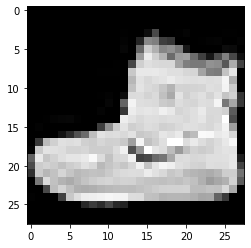

In [3]:
plt.imshow(x_train[0], cmap='gray', vmin = 0, vmax = 255)

and the first target in the training data is 9, which corresponds to an ankle boot.

In [4]:
print('Target:',y_train[0])

Target: 9


Thus, the goal is to create a neural network which successfully maps numbers representing grayscale values (which in turn represent pixels in a picture of an article of clothing) to a number between 0 and 9, corresponding to the label for that article of clothing.

# Measure of Success
We simply say that accuracy is our desired measure of success. If the model correctly categorizes enough examples, we say that it is a good model.

# Evaluation Protocol
Considering the relatively large size of the dataset and the high quality of it, it is likely fine to use hold-out validation as opposed to k-fold validation or a variation. If the result isn't good enough, we may adjust this, but there's no reason to do so at the moment.  

We'll choose to hold out 10% of the training data, somewhat arbitrarily. The dataset is large enough that anything from 10-30% is sufficient.


# Data Preparation
 We first reshape the input tensor, flattening the 28 rows into 1 row with 28 \* 28 elements. We can then index into any pixel (i,j) in the original element with 28 \* i + j. This allows us to pass the entire array into the neural network at once. Finally, we scale the values to be between 0 and 1, regularizing the input.

In [5]:
print('Input shape:', x_train.shape)
print('Input value:', x_train[0][15][15])

Input shape: (60000, 28, 28)
Input value: 221


In [6]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [7]:
print('Input shape:', x_train.shape)
print('Input value:', x_train[0][15 * 28 + 15])

Input shape: (60000, 784)
Input value: 0.8666667


Next, we encode the output using one-hot encoding, which allows us to have a final softmax layer of neurons in the neural network.

In [8]:
print('Output value:', y_train[0])

Output value: 9


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print('Output value:', y_train[0])

Output value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Since all the data is homogeneous, we don't need to normalize anything else. We're not going to feature engineer anything, because it would be comparatively difficult with the model we're designing for very little gain.

# Statistical Power
For our first attempt, we want to develop a model that is better than the baseline for our chosen task. Here, random chance could pick the correct label for a given picture 10% of the time, so our model needs to be able to beat 10% accuracy to even be considered.  



We already chose our measure of success to be accuracy, so we implement that. Next, we choose our activation functions to be relu, as normal, and softmax for the last layer, since this is a multiclass, single-label classification problem. For that same reason, we pick our loss function to be categorical_crossentropy.  

The simplest neural network possible for our purposes is a single densely connected neuron, ouputting to all 10 neurons in the softmax layer.

In [11]:
baseline = models.Sequential()
baseline.add(layers.Dense(1, activation = 'relu', input_shape = (28 * 28,)))
baseline.add(layers.Dense(10, activation = 'softmax'))
baseline.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


We fit the data to the model, measuring our accuracy on the validation data to determine if it has statistical power.

In [13]:
baseline_history = baseline.fit(x_train, 
                                y_train, 
                                epochs = 25, 
                                batch_size = 128, 
                                validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 4s 67us/sample - loss: 2.0464 - accuracy: 0.1872 - val_loss: 1.9567 - val_accuracy: 0.2192
Epoch 2/25
54000/54000 [==============================] - 2s 33us/sample - loss: 1.9203 - accuracy: 0.2375 - val_loss: 1.8680 - val_accuracy: 0.2582
Epoch 3/25
54000/54000 [==============================] - 2s 35us/sample - loss: 1.8411 - accuracy: 0.2753 - val_loss: 1.7983 - val_accuracy: 0.2958
Epoch 4/25
54000/54000 [==============================] - 2s 35us/sample - loss: 1.7711 - accuracy: 0.2958 - val_loss: 1.7352 - val_accuracy: 0.2940
Epoch 5/25
54000/54000 [==============================] - 2s 32us/sample - loss: 1.7094 - accuracy: 0.2889 - val_loss: 1.6800 - val_accuracy: 0.2885
Epoch 6/25
54000/54000 [==============================] - 2s 32us/sample - loss: 1.6543 - accuracy: 0.2916 - val_loss: 1.6306 - val_accuracy: 0.2935
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

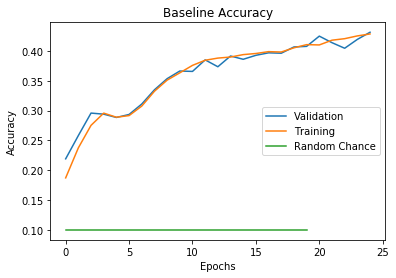

In [14]:
plt.plot(baseline_history.history['val_accuracy'])
plt.plot(baseline_history.history['accuracy'])
plt.plot([0, 19], [0.1, 0.1])
plt.title('Baseline Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Validation', 'Training', 'Random Chance'], loc = 'right')
plt.show

As we can see, after only 1 epoch, the model begins to have statistical power, since it immediately beats random chance's accuracy of 10%. Thus, we can continue to optimize the model, trying to achieve a better accuracy than the baseline model's 45%.

# Overfitting

We now scale the model up, trying to find the correct layer architecture. We list a number of possible options, across the spectrum of complexity.
1.   1 layer: 64 neurons
2.   1 layer: 256 neurons
3.   2 layers: 128 - 128 neurons
4.   2 layers: 256 - 256 neurons
5.   3 layers: 512 - 256 - 128 neurons

In [15]:
network64 = models.Sequential()
network64.add(layers.Dense(64, activation = 'relu', input_shape = (28 * 28,)))
network64.add(layers.Dense(10, activation = 'softmax'))
network64.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network64_history = network64.fit(x_train, 
                                  y_train, 
                                  epochs = 25, 
                                  batch_size = 128, 
                                  validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 33us/sample - loss: 0.6207 - accuracy: 0.7863 - val_loss: 0.4719 - val_accuracy: 0.8235
Epoch 2/25
54000/54000 [==============================] - 1s 23us/sample - loss: 0.4443 - accuracy: 0.8443 - val_loss: 0.4249 - val_accuracy: 0.8533
Epoch 3/25
54000/54000 [==============================] - 1s 20us/sample - loss: 0.3997 - accuracy: 0.8585 - val_loss: 0.4517 - val_accuracy: 0.8412
Epoch 4/25
54000/54000 [==============================] - 1s 21us/sample - loss: 0.3704 - accuracy: 0.8686 - val_loss: 0.3993 - val_accuracy: 0.8547
Epoch 5/25
54000/54000 [==============================] - 1s 22us/sample - loss: 0.3497 - accuracy: 0.8739 - val_loss: 0.3627 - val_accuracy: 0.8715
Epoch 6/25
54000/54000 [==============================] - 1s 21us/sample - loss: 0.3328 - accuracy: 0.8801 - val_loss: 0.3475 - val_accuracy: 0.8762
Epoch 7/25
54000/54000 [==============================] -

In [16]:
network256 = models.Sequential()
network256.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
network256.add(layers.Dense(10, activation = 'softmax'))
network256.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network256_history = network256.fit(x_train, 
                                    y_train, 
                                    epochs = 25, 
                                    batch_size = 128, 
                                    validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 50us/sample - loss: 0.5736 - accuracy: 0.7983 - val_loss: 0.4459 - val_accuracy: 0.8362
Epoch 2/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3947 - accuracy: 0.8564 - val_loss: 0.3891 - val_accuracy: 0.8558
Epoch 3/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3470 - accuracy: 0.8732 - val_loss: 0.3692 - val_accuracy: 0.8588
Epoch 4/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3187 - accuracy: 0.8839 - val_loss: 0.3520 - val_accuracy: 0.8738
Epoch 5/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3013 - accuracy: 0.8895 - val_loss: 0.3758 - val_accuracy: 0.8632
Epoch 6/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2848 - accuracy: 0.8943 - val_loss: 0.3470 - val_accuracy: 0.8737
Epoch 7/25
54000/54000 [==============================] -

In [17]:
network128_128 = models.Sequential()
network128_128.add(layers.Dense(128, activation = 'relu', input_shape = (28 * 28,)))
network128_128.add(layers.Dense(128, activation = 'relu'))
network128_128.add(layers.Dense(10, activation = 'softmax'))
network128_128.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network128_128_history = network128_128.fit(x_train, 
                                            y_train, 
                                            epochs = 25, 
                                            batch_size = 128, 
                                            validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 56us/sample - loss: 0.5675 - accuracy: 0.7961 - val_loss: 0.4356 - val_accuracy: 0.8402
Epoch 2/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3957 - accuracy: 0.8549 - val_loss: 0.3772 - val_accuracy: 0.8600
Epoch 3/25
54000/54000 [==============================] - 3s 57us/sample - loss: 0.3507 - accuracy: 0.8720 - val_loss: 0.3612 - val_accuracy: 0.8658
Epoch 4/25
54000/54000 [==============================] - 3s 54us/sample - loss: 0.3234 - accuracy: 0.8817 - val_loss: 0.3463 - val_accuracy: 0.8735
Epoch 5/25
54000/54000 [==============================] - 2s 45us/sample - loss: 0.3038 - accuracy: 0.8867 - val_loss: 0.3953 - val_accuracy: 0.8605
Epoch 6/25
54000/54000 [==============================] - 2s 46us/sample - loss: 0.2885 - accuracy: 0.8935 - val_loss: 0.3448 - val_accuracy: 0.8735
Epoch 7/25
54000/54000 [==============================] -

In [18]:
network256_256 = models.Sequential()
network256_256.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
network256_256.add(layers.Dense(256, activation = 'relu'))
network256_256.add(layers.Dense(10, activation = 'softmax'))
network256_256.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network256_256_history = network256_256.fit(x_train, 
                                            y_train, 
                                            epochs = 25, 
                                            batch_size = 128, 
                                            validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 6s 113us/sample - loss: 0.5564 - accuracy: 0.7955 - val_loss: 0.3825 - val_accuracy: 0.8580
Epoch 2/25
54000/54000 [==============================] - 3s 48us/sample - loss: 0.3842 - accuracy: 0.8580 - val_loss: 0.3533 - val_accuracy: 0.8717
Epoch 3/25
54000/54000 [==============================] - 3s 46us/sample - loss: 0.3370 - accuracy: 0.8747 - val_loss: 0.4152 - val_accuracy: 0.8485
Epoch 4/25
54000/54000 [==============================] - 2s 44us/sample - loss: 0.3101 - accuracy: 0.8853 - val_loss: 0.4111 - val_accuracy: 0.8472
Epoch 5/25
54000/54000 [==============================] - 2s 43us/sample - loss: 0.2914 - accuracy: 0.8919 - val_loss: 0.3318 - val_accuracy: 0.8808
Epoch 6/25
54000/54000 [==============================] - 2s 43us/sample - loss: 0.2749 - accuracy: 0.8980 - val_loss: 0.3381 - val_accuracy: 0.8777
Epoch 7/25
54000/54000 [==============================] 

<function matplotlib.pyplot.show(*args, **kw)>

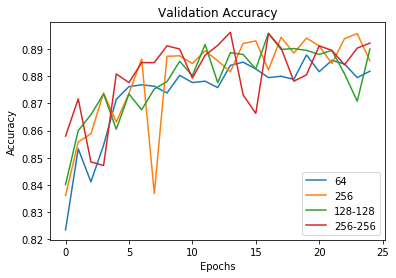

In [19]:
plt.plot(network64_history.history['val_accuracy'])
plt.plot(network256_history.history['val_accuracy'])
plt.plot(network128_128_history.history['val_accuracy'])
plt.plot(network256_256_history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['64', '256', '128-128', '256-256'], loc = 'lower right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

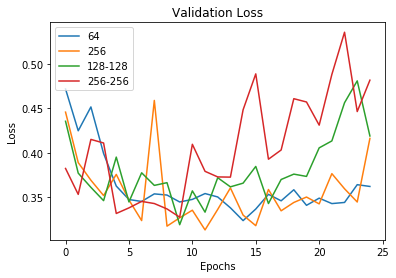

In [20]:
plt.plot(network64_history.history['val_loss'])
plt.plot(network256_history.history['val_loss'])
plt.plot(network128_128_history.history['val_loss'])
plt.plot(network256_256_history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['64', '256', '128-128', '256-256'], loc = 'upper left')
plt.show

In [21]:
val, idx = min((val, idx) for (idx, val) in enumerate(network64_history.history['val_loss']))
print('Minimum loss with 64 nodes:', val, 'at', idx, 'epochs')
val, idx = min((val, idx) for (idx, val) in enumerate(network256_history.history['val_loss']))
print('Minimum loss with 256 nodes:', val, 'at', idx, 'epochs')

Minimum loss with 64 nodes: 0.32380373644828797 at 14 epochs
Minimum loss with 256 nodes: 0.31333739574750263 at 11 epochs


As we can see, the model with 256 nodes had the lowest loss while maintaining an on-par accuracy and the second lowest rate of overfitting. As this last problem can be fixed by adjusting other hyper-parameters, we'll continue with this model.

# Regularization
We now want to regularize the model, to get as close to a perfect network as is possible. To do so, we will adjust the following hyper-parameters:

1. Batch Size
1. Dropout
4. Weight Regularization
5. Learning Rate

## Batch Size
We want to determine what the correct batch size will be for our training, to be the right balance between time spent training and reward for doing so. We'll try 128, 256, and 512 elements per batch.

In [22]:
networkB128 = models.Sequential()
networkB128.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkB128.add(layers.Dense(256, activation = 'relu'))
networkB128.add(layers.Dense(10, activation = 'softmax'))
networkB128.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkB128_history = networkB128.fit(x_train, 
                                            y_train, 
                                            epochs = 25, 
                                            batch_size = 128, 
                                            validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 5s 93us/sample - loss: 0.5568 - accuracy: 0.7976 - val_loss: 0.4324 - val_accuracy: 0.8440
Epoch 2/25
54000/54000 [==============================] - 3s 48us/sample - loss: 0.3812 - accuracy: 0.8600 - val_loss: 0.3577 - val_accuracy: 0.8690
Epoch 3/25
54000/54000 [==============================] - 3s 56us/sample - loss: 0.3383 - accuracy: 0.8747 - val_loss: 0.3493 - val_accuracy: 0.8745
Epoch 4/25
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3115 - accuracy: 0.8850 - val_loss: 0.3542 - val_accuracy: 0.8803
Epoch 5/25
54000/54000 [==============================] - 2s 44us/sample - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.4101 - val_accuracy: 0.8647
Epoch 6/25
54000/54000 [==============================] - 3s 47us/sample - loss: 0.2762 - accuracy: 0.8966 - val_loss: 0.3214 - val_accuracy: 0.8837
Epoch 7/25
54000/54000 [==============================] -

In [23]:
networkB256 = models.Sequential()
networkB256.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkB256.add(layers.Dense(256, activation = 'relu'))
networkB256.add(layers.Dense(10, activation = 'softmax'))
networkB256.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkB256_history = networkB256.fit(x_train, 
                                            y_train, 
                                            epochs = 25, 
                                            batch_size = 256, 
                                            validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 51us/sample - loss: 0.6353 - accuracy: 0.7721 - val_loss: 0.4200 - val_accuracy: 0.8447
Epoch 2/25
54000/54000 [==============================] - 3s 52us/sample - loss: 0.4173 - accuracy: 0.8460 - val_loss: 0.3918 - val_accuracy: 0.8562
Epoch 3/25
54000/54000 [==============================] - 3s 59us/sample - loss: 0.3630 - accuracy: 0.8646 - val_loss: 0.3838 - val_accuracy: 0.8623
Epoch 4/25
54000/54000 [==============================] - 3s 46us/sample - loss: 0.3299 - accuracy: 0.8771 - val_loss: 0.3453 - val_accuracy: 0.8708
Epoch 5/25
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3059 - accuracy: 0.8866 - val_loss: 0.4347 - val_accuracy: 0.8388
Epoch 6/25
54000/54000 [==============================] - 3s 64us/sample - loss: 0.2871 - accuracy: 0.8915 - val_loss: 0.3471 - val_accuracy: 0.8693
Epoch 7/25
54000/54000 [==============================] -

In [24]:
networkB512 = models.Sequential()
networkB512.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkB512.add(layers.Dense(256, activation = 'relu'))
networkB512.add(layers.Dense(10, activation = 'softmax'))
networkB512.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkB512_history = networkB512.fit(x_train, 
                                            y_train, 
                                            epochs = 25, 
                                            batch_size = 512, 
                                            validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.7191 - accuracy: 0.7422 - val_loss: 0.4602 - val_accuracy: 0.8325
Epoch 2/25
54000/54000 [==============================] - 1s 27us/sample - loss: 0.4694 - accuracy: 0.8275 - val_loss: 0.4807 - val_accuracy: 0.8252
Epoch 3/25
54000/54000 [==============================] - 1s 25us/sample - loss: 0.4046 - accuracy: 0.8487 - val_loss: 0.3955 - val_accuracy: 0.8563
Epoch 4/25
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3683 - accuracy: 0.8633 - val_loss: 0.3597 - val_accuracy: 0.8717
Epoch 5/25
54000/54000 [==============================] - 1s 26us/sample - loss: 0.3424 - accuracy: 0.8731 - val_loss: 0.3733 - val_accuracy: 0.8652
Epoch 6/25
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3201 - accuracy: 0.8812 - val_loss: 0.3812 - val_accuracy: 0.8675
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

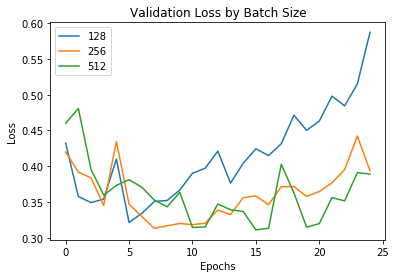

In [25]:
plt.plot(networkB128_history.history['val_loss'])
plt.plot(networkB256_history.history['val_loss'])
plt.plot(networkB512_history.history['val_loss'])
plt.title('Validation Loss by Batch Size')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['128', '256', '512'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

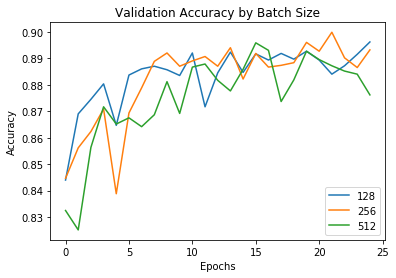

In [26]:
plt.plot(networkB128_history.history['val_accuracy'])
plt.plot(networkB256_history.history['val_accuracy'])
plt.plot(networkB512_history.history['val_accuracy'])
plt.title('Validation Accuracy by Batch Size')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['128', '256', '512'], loc = 'lower right')
plt.show

In [27]:
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkB128_history.history['val_loss']))
print('Minimum loss with 128 batch size:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkB256_history.history['val_loss']))
print('Minimum loss with 256 batch size:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkB512_history.history['val_loss']))
print('Minimum loss with 512 batch size:', val, 'at', idx, 'epochs')

Minimum loss with 128 batch size: 0.32142133990923566 at 5 epochs
Minimum loss with 256 batch size: 0.3132804304758708 at 7 epochs
Minimum loss with 512 batch size: 0.31108955685297646 at 15 epochs


Since a batch size of 256 reduces the loss by more than the other two or sooner than the other two, it's the clear winner. We'll continue with this batch size from now on.
## Dropout
We'll now experiment with dropout, comparing a model with no dropout to models with dropouts varying from 0.2 to 0.5.

In [28]:
networkD0 = tf.keras.models.Sequential()
networkD0.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkD0.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkD0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkD0_history = networkD0.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 37us/sample - loss: 0.6521 - accuracy: 0.7744 - val_loss: 0.4569 - val_accuracy: 0.8383
Epoch 2/25
54000/54000 [==============================] - 1s 22us/sample - loss: 0.4435 - accuracy: 0.8396 - val_loss: 0.3813 - val_accuracy: 0.8638
Epoch 3/25
54000/54000 [==============================] - 2s 43us/sample - loss: 0.3874 - accuracy: 0.8588 - val_loss: 0.3746 - val_accuracy: 0.8615
Epoch 4/25
54000/54000 [==============================] - 3s 47us/sample - loss: 0.3520 - accuracy: 0.8707 - val_loss: 0.3830 - val_accuracy: 0.8622
Epoch 5/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3295 - accuracy: 0.8804 - val_loss: 0.3753 - val_accuracy: 0.8632
Epoch 6/25
54000/54000 [==============================] - 1s 23us/sample - loss: 0.3096 - accuracy: 0.8857 - val_loss: 0.3336 - val_accuracy: 0.8793
Epoch 7/25
54000/54000 [==============================] -

In [29]:
networkD2 = tf.keras.models.Sequential()
networkD2.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkD2.add(tf.keras.layers.Dropout(0.2))
networkD2.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkD2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkD2_history = networkD2.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.6728 - accuracy: 0.7691 - val_loss: 0.4458 - val_accuracy: 0.8417
Epoch 2/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4508 - accuracy: 0.8380 - val_loss: 0.4299 - val_accuracy: 0.8452
Epoch 3/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3918 - accuracy: 0.8584 - val_loss: 0.3575 - val_accuracy: 0.8725
Epoch 4/25
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3613 - accuracy: 0.8690 - val_loss: 0.3413 - val_accuracy: 0.8758
Epoch 5/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3408 - accuracy: 0.8759 - val_loss: 0.3455 - val_accuracy: 0.8760
Epoch 6/25
54000/54000 [==============================] - 2s 30us/sample - loss: 0.3227 - accuracy: 0.8825 - val_loss: 0.3325 - val_accuracy: 0.8793
Epoch 7/25
54000/54000 [==============================] -

In [30]:
networkD3 = tf.keras.models.Sequential()
networkD3.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkD3.add(tf.keras.layers.Dropout(0.3))
networkD3.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkD3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkD3_history = networkD3.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 47us/sample - loss: 0.6779 - accuracy: 0.7638 - val_loss: 0.4916 - val_accuracy: 0.8135
Epoch 2/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4537 - accuracy: 0.8366 - val_loss: 0.3898 - val_accuracy: 0.8555
Epoch 3/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3990 - accuracy: 0.8565 - val_loss: 0.3651 - val_accuracy: 0.8627
Epoch 4/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.3696 - accuracy: 0.8666 - val_loss: 0.3535 - val_accuracy: 0.8708
Epoch 5/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3503 - accuracy: 0.8714 - val_loss: 0.3554 - val_accuracy: 0.8678
Epoch 6/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3330 - accuracy: 0.8785 - val_loss: 0.3488 - val_accuracy: 0.8703
Epoch 7/25
54000/54000 [==============================] -

In [31]:
networkD4 = tf.keras.models.Sequential()
networkD4.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkD4.add(tf.keras.layers.Dropout(0.4))
networkD4.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkD4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkD4_history = networkD4.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 53us/sample - loss: 0.6900 - accuracy: 0.7600 - val_loss: 0.4770 - val_accuracy: 0.8307
Epoch 2/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4691 - accuracy: 0.8324 - val_loss: 0.3901 - val_accuracy: 0.8517
Epoch 3/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4167 - accuracy: 0.8491 - val_loss: 0.3927 - val_accuracy: 0.8555
Epoch 4/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.3852 - accuracy: 0.8604 - val_loss: 0.3517 - val_accuracy: 0.8722
Epoch 5/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3661 - accuracy: 0.8676 - val_loss: 0.3550 - val_accuracy: 0.8713
Epoch 6/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3493 - accuracy: 0.8734 - val_loss: 0.3396 - val_accuracy: 0.8772
Epoch 7/25
54000/54000 [==============================] -

In [32]:
networkD5 = tf.keras.models.Sequential()
networkD5.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkD5.add(tf.keras.layers.Dropout(0.5))
networkD5.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkD5.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkD5_history = networkD5.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 4s 66us/sample - loss: 0.6979 - accuracy: 0.7561 - val_loss: 0.4671 - val_accuracy: 0.8318
Epoch 2/25
54000/54000 [==============================] - 2s 30us/sample - loss: 0.4739 - accuracy: 0.8310 - val_loss: 0.4177 - val_accuracy: 0.8525
Epoch 3/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4248 - accuracy: 0.8463 - val_loss: 0.3756 - val_accuracy: 0.8610
Epoch 4/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.3978 - accuracy: 0.8548 - val_loss: 0.3729 - val_accuracy: 0.8690
Epoch 5/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3798 - accuracy: 0.8634 - val_loss: 0.3491 - val_accuracy: 0.8683
Epoch 6/25
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3659 - accuracy: 0.8669 - val_loss: 0.3492 - val_accuracy: 0.8725
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

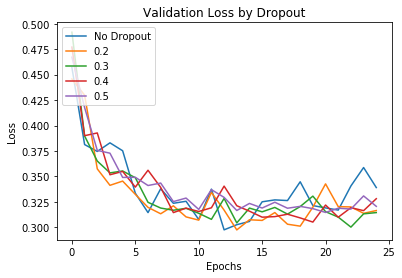

In [33]:
plt.plot(networkD0_history.history['val_loss'])
plt.plot(networkD2_history.history['val_loss'])
plt.plot(networkD3_history.history['val_loss'])
plt.plot(networkD4_history.history['val_loss'])
plt.plot(networkD5_history.history['val_loss'])
plt.title('Validation Loss by Dropout')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['No Dropout', '0.2', '0.3', '0.4', '0.5'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

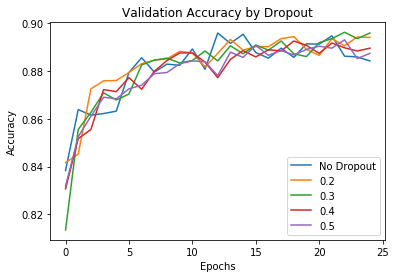

In [34]:
plt.plot(networkD0_history.history['val_accuracy'])
plt.plot(networkD2_history.history['val_accuracy'])
plt.plot(networkD3_history.history['val_accuracy'])
plt.plot(networkD4_history.history['val_accuracy'])
plt.plot(networkD5_history.history['val_accuracy'])
plt.title('Validation Accuracy by Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['No Dropout', '0.2', '0.3', '0.4', '0.5'], loc = 'lower right')
plt.show

In [35]:
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkD0_history.history['val_loss']))
print('Minimum loss with no dropout:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkD2_history.history['val_loss']))
print('Minimum loss with 0.2 dropout:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkD3_history.history['val_loss']))
print('Minimum loss with 0.3 dropout:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkD4_history.history['val_loss']))
print('Minimum loss with 0.4 dropout:', val, 'at', idx, 'epochs')
(val, idx) = min((val, idx) for (idx, val) in enumerate(networkD5_history.history['val_loss']))
print('Minimum loss with 0.5 dropout:', val, 'at', idx, 'epochs')

Minimum loss with no dropout: 0.29761008286476137 at 12 epochs
Minimum loss with 0.2 dropout: 0.2975347415606181 at 13 epochs
Minimum loss with 0.3 dropout: 0.3002844782670339 at 22 epochs
Minimum loss with 0.4 dropout: 0.3052266853650411 at 19 epochs
Minimum loss with 0.5 dropout: 0.3146891124248505 at 20 epochs


We can see that the loss of the model with 0.2 and 0.5 dropout spikes too much and takes too long to reach a minimum, while having no dropout overfits far too much. As a result, and considering Occam's Razor, we choose to continue with a dropout rate of 0.3.
## Weight regularization
### L2
We'll try adding L2 regularization next, with anywhere between 0 and 0.0001 multipliers on the L2 regularizer.

In [36]:
networkR0 = tf.keras.models.Sequential()
networkR0.add(tf.keras.layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
networkR0.add(tf.keras.layers.Dropout(0.3))
networkR0.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR0_history = networkR0.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.6583 - accuracy: 0.7681 - val_loss: 0.4975 - val_accuracy: 0.8227
Epoch 2/25
54000/54000 [==============================] - 1s 28us/sample - loss: 0.4484 - accuracy: 0.8382 - val_loss: 0.4301 - val_accuracy: 0.8443
Epoch 3/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3953 - accuracy: 0.8557 - val_loss: 0.3682 - val_accuracy: 0.8635
Epoch 4/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3673 - accuracy: 0.8660 - val_loss: 0.3498 - val_accuracy: 0.8732
Epoch 5/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.3511 - accuracy: 0.8711 - val_loss: 0.3386 - val_accuracy: 0.8738
Epoch 6/25
54000/54000 [==============================] - 1s 24us/sample - loss: 0.3324 - accuracy: 0.8790 - val_loss: 0.3332 - val_accuracy: 0.8753
Epoch 7/25
54000/54000 [==============================] -

In [37]:
networkR1 = tf.keras.models.Sequential()
networkR1.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.1), input_shape = (28 * 28,)))
networkR1.add(tf.keras.layers.Dropout(0.3))
networkR1.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR1_history = networkR1.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 6s 103us/sample - loss: 4.4728 - accuracy: 0.6495 - val_loss: 1.0415 - val_accuracy: 0.7303
Epoch 2/25
54000/54000 [==============================] - 3s 48us/sample - loss: 1.1328 - accuracy: 0.6855 - val_loss: 1.1193 - val_accuracy: 0.6798
Epoch 3/25
54000/54000 [==============================] - 3s 57us/sample - loss: 1.0881 - accuracy: 0.6909 - val_loss: 1.0363 - val_accuracy: 0.7195
Epoch 4/25
54000/54000 [==============================] - 2s 44us/sample - loss: 1.0624 - accuracy: 0.6966 - val_loss: 1.2778 - val_accuracy: 0.6212
Epoch 5/25
54000/54000 [==============================] - 3s 52us/sample - loss: 1.0370 - accuracy: 0.7037 - val_loss: 0.8593 - val_accuracy: 0.7678
Epoch 6/25
54000/54000 [==============================] - 2s 44us/sample - loss: 1.0242 - accuracy: 0.7081 - val_loss: 0.8841 - val_accuracy: 0.7558
Epoch 7/25
54000/54000 [==============================] 

In [38]:
networkR2 = tf.keras.models.Sequential()
networkR2.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), input_shape = (28 * 28,)))
networkR2.add(tf.keras.layers.Dropout(0.3))
networkR2.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR2_history = networkR2.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 43us/sample - loss: 1.8145 - accuracy: 0.7387 - val_loss: 0.9741 - val_accuracy: 0.7818
Epoch 2/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.8251 - accuracy: 0.7809 - val_loss: 0.8133 - val_accuracy: 0.7683
Epoch 3/25
54000/54000 [==============================] - 1s 26us/sample - loss: 0.7280 - accuracy: 0.7882 - val_loss: 0.6531 - val_accuracy: 0.8127
Epoch 4/25
54000/54000 [==============================] - 1s 26us/sample - loss: 0.7004 - accuracy: 0.7926 - val_loss: 0.6464 - val_accuracy: 0.8173
Epoch 5/25
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6816 - accuracy: 0.7969 - val_loss: 0.6502 - val_accuracy: 0.8117
Epoch 6/25
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6690 - accuracy: 0.8022 - val_loss: 0.6040 - val_accuracy: 0.8240
Epoch 7/25
54000/54000 [==============================] -

In [39]:
networkR3 = tf.keras.models.Sequential()
networkR3.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkR3.add(tf.keras.layers.Dropout(0.3))
networkR3.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR3_history = networkR0.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 30us/sample - loss: 0.2190 - accuracy: 0.9183 - val_loss: 0.3121 - val_accuracy: 0.8955
Epoch 2/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2167 - accuracy: 0.9186 - val_loss: 0.3194 - val_accuracy: 0.8930
Epoch 3/25
54000/54000 [==============================] - 1s 25us/sample - loss: 0.2096 - accuracy: 0.9217 - val_loss: 0.3176 - val_accuracy: 0.8940
Epoch 4/25
54000/54000 [==============================] - 1s 25us/sample - loss: 0.2088 - accuracy: 0.9217 - val_loss: 0.3117 - val_accuracy: 0.8925
Epoch 5/25
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2075 - accuracy: 0.9225 - val_loss: 0.3091 - val_accuracy: 0.8963
Epoch 6/25
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2047 - accuracy: 0.9242 - val_loss: 0.3071 - val_accuracy: 0.8985
Epoch 7/25
54000/54000 [==============================] -

In [40]:
networkR4 = tf.keras.models.Sequential()
networkR4.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001), input_shape = (28 * 28,)))
networkR4.add(tf.keras.layers.Dropout(0.3))
networkR4.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR4_history = networkR4.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 4s 69us/sample - loss: 0.7043 - accuracy: 0.7677 - val_loss: 0.5296 - val_accuracy: 0.8232
Epoch 2/25
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4917 - accuracy: 0.8380 - val_loss: 0.4703 - val_accuracy: 0.8442
Epoch 3/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.4436 - accuracy: 0.8541 - val_loss: 0.4207 - val_accuracy: 0.8598
Epoch 4/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4169 - accuracy: 0.8621 - val_loss: 0.4160 - val_accuracy: 0.8630
Epoch 5/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.3984 - accuracy: 0.8688 - val_loss: 0.4004 - val_accuracy: 0.8725
Epoch 6/25
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3865 - accuracy: 0.8746 - val_loss: 0.3845 - val_accuracy: 0.8735
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

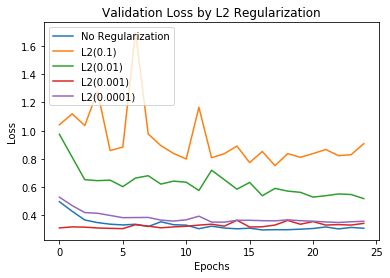

In [41]:
plt.plot(networkR0_history.history['val_loss'])
plt.plot(networkR1_history.history['val_loss'])
plt.plot(networkR2_history.history['val_loss'])
plt.plot(networkR3_history.history['val_loss'])
plt.plot(networkR4_history.history['val_loss'])
plt.title('Validation Loss by L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['No Regularization', 'L2(0.1)', 'L2(0.01)', 'L2(0.001)', 'L2(0.0001)'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

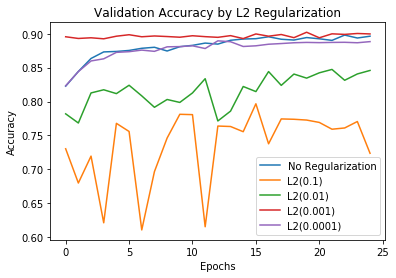

In [42]:
plt.plot(networkR0_history.history['val_accuracy'])
plt.plot(networkR1_history.history['val_accuracy'])
plt.plot(networkR2_history.history['val_accuracy'])
plt.plot(networkR3_history.history['val_accuracy'])
plt.plot(networkR4_history.history['val_accuracy'])
plt.title('Validation Accuracy by L2 Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['No Regularization', 'L2(0.1)', 'L2(0.01)', 'L2(0.001)', 'L2(0.0001)'], loc = 'lower right')
plt.show

Unsurprisingly, we see that the smaller regularizers do a better job of smoothing the data. We see that L2(0.001) does a good job of preventing overfitting in the graph, with a smooth slope. It also has the best accuracy of any of the regularizers, even from the start. As such, we'll continue with it as the regularizer.
### L1
Next, we'll add an L1 regularizer, in addition to our already chosen L2 regularizer. Again, we'll use regularizers ranging from 0 to 0.0001. 

In [43]:
networkR20 = tf.keras.models.Sequential()
networkR20.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkR20.add(tf.keras.layers.Dropout(0.3))
networkR20.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR20.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR20_history = networkR20.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.9539 - accuracy: 0.7624 - val_loss: 0.7196 - val_accuracy: 0.8143
Epoch 2/25
54000/54000 [==============================] - 1s 26us/sample - loss: 0.6687 - accuracy: 0.8251 - val_loss: 0.6196 - val_accuracy: 0.8238
Epoch 3/25
54000/54000 [==============================] - 1s 26us/sample - loss: 0.5874 - accuracy: 0.8364 - val_loss: 0.5668 - val_accuracy: 0.8287
Epoch 4/25
54000/54000 [==============================] - 2s 29us/sample - loss: 0.5426 - accuracy: 0.8439 - val_loss: 0.5063 - val_accuracy: 0.8545
Epoch 5/25
54000/54000 [==============================] - 2s 30us/sample - loss: 0.5132 - accuracy: 0.8494 - val_loss: 0.4915 - val_accuracy: 0.8613
Epoch 6/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4908 - accuracy: 0.8531 - val_loss: 0.4877 - val_accuracy: 0.8533
Epoch 7/25
54000/54000 [==============================] -

In [44]:
networkR21 = tf.keras.models.Sequential()
networkR21.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.1, l2 = 0.001), input_shape = (28 * 28,)))
networkR21.add(tf.keras.layers.Dropout(0.3))
networkR21.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR21.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR21_history = networkR21.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 61us/sample - loss: 79.3248 - accuracy: 0.2745 - val_loss: 12.3056 - val_accuracy: 0.2225
Epoch 2/25
54000/54000 [==============================] - 2s 32us/sample - loss: 12.3214 - accuracy: 0.1870 - val_loss: 12.3321 - val_accuracy: 0.1047
Epoch 3/25
54000/54000 [==============================] - 2s 30us/sample - loss: 12.3229 - accuracy: 0.1870 - val_loss: 12.3131 - val_accuracy: 0.2050
Epoch 4/25
54000/54000 [==============================] - 2s 40us/sample - loss: 12.3255 - accuracy: 0.1967 - val_loss: 12.2972 - val_accuracy: 0.1933
Epoch 5/25
54000/54000 [==============================] - 3s 46us/sample - loss: 12.3305 - accuracy: 0.1978 - val_loss: 12.3202 - val_accuracy: 0.2717
Epoch 6/25
54000/54000 [==============================] - 3s 57us/sample - loss: 12.3254 - accuracy: 0.2010 - val_loss: 12.2657 - val_accuracy: 0.1333
Epoch 7/25
54000/54000 [=====================

In [45]:
networkR22 = tf.keras.models.Sequential()
networkR22.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.01, l2 = 0.001), input_shape = (28 * 28,)))
networkR22.add(tf.keras.layers.Dropout(0.3))
networkR22.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR22.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR22_history = networkR22.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 51us/sample - loss: 10.1755 - accuracy: 0.5188 - val_loss: 2.7244 - val_accuracy: 0.5847
Epoch 2/25
54000/54000 [==============================] - 2s 44us/sample - loss: 2.6988 - accuracy: 0.5907 - val_loss: 2.6269 - val_accuracy: 0.6458
Epoch 3/25
54000/54000 [==============================] - 2s 39us/sample - loss: 2.5450 - accuracy: 0.6161 - val_loss: 2.3741 - val_accuracy: 0.6870
Epoch 4/25
54000/54000 [==============================] - 2s 40us/sample - loss: 2.4612 - accuracy: 0.6343 - val_loss: 2.3925 - val_accuracy: 0.6695
Epoch 5/25
54000/54000 [==============================] - 2s 39us/sample - loss: 2.4004 - accuracy: 0.6492 - val_loss: 2.2694 - val_accuracy: 0.7017
Epoch 6/25
54000/54000 [==============================] - 2s 35us/sample - loss: 2.3663 - accuracy: 0.6553 - val_loss: 2.1736 - val_accuracy: 0.7305
Epoch 7/25
54000/54000 [==============================] 

In [46]:
networkR23 = tf.keras.models.Sequential()
networkR23.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.001, l2 = 0.001), input_shape = (28 * 28,)))
networkR23.add(tf.keras.layers.Dropout(0.3))
networkR23.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR23.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR23_history = networkR23.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 41us/sample - loss: 3.2175 - accuracy: 0.7159 - val_loss: 1.5656 - val_accuracy: 0.7125
Epoch 2/25
54000/54000 [==============================] - 2s 29us/sample - loss: 1.2720 - accuracy: 0.7467 - val_loss: 1.0893 - val_accuracy: 0.7618
Epoch 3/25
54000/54000 [==============================] - 2s 29us/sample - loss: 1.1034 - accuracy: 0.7554 - val_loss: 1.0432 - val_accuracy: 0.7497
Epoch 4/25
54000/54000 [==============================] - 2s 33us/sample - loss: 1.0419 - accuracy: 0.7638 - val_loss: 1.0038 - val_accuracy: 0.7895
Epoch 5/25
54000/54000 [==============================] - 2s 40us/sample - loss: 1.0022 - accuracy: 0.7683 - val_loss: 0.8863 - val_accuracy: 0.8033
Epoch 6/25
54000/54000 [==============================] - 3s 55us/sample - loss: 0.9732 - accuracy: 0.7731 - val_loss: 0.8638 - val_accuracy: 0.8100
Epoch 7/25
54000/54000 [==============================] -

In [47]:
networkR24 = tf.keras.models.Sequential()
networkR24.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.0001, l2 = 0.001), input_shape = (28 * 28,)))
networkR24.add(tf.keras.layers.Dropout(0.3))
networkR24.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkR24.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkR24_history = networkR24.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 49us/sample - loss: 1.3989 - accuracy: 0.7552 - val_loss: 0.9929 - val_accuracy: 0.8228
Epoch 2/25
54000/54000 [==============================] - 2s 33us/sample - loss: 0.9077 - accuracy: 0.8129 - val_loss: 0.8575 - val_accuracy: 0.7875
Epoch 3/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.7642 - accuracy: 0.8231 - val_loss: 0.6734 - val_accuracy: 0.8468
Epoch 4/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.6897 - accuracy: 0.8290 - val_loss: 0.6717 - val_accuracy: 0.8212
Epoch 5/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.6530 - accuracy: 0.8296 - val_loss: 0.6731 - val_accuracy: 0.8238
Epoch 6/25
54000/54000 [==============================] - 2s 36us/sample - loss: 0.6263 - accuracy: 0.8342 - val_loss: 0.5646 - val_accuracy: 0.8532
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

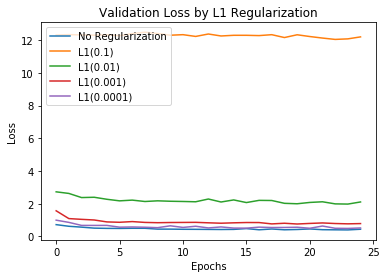

In [48]:
plt.plot(networkR20_history.history['val_loss'])
plt.plot(networkR21_history.history['val_loss'])
plt.plot(networkR22_history.history['val_loss'])
plt.plot(networkR23_history.history['val_loss'])
plt.plot(networkR24_history.history['val_loss'])
plt.title('Validation Loss by L1 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['No Regularization', 'L1(0.1)', 'L1(0.01)', 'L1(0.001)', 'L1(0.0001)'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

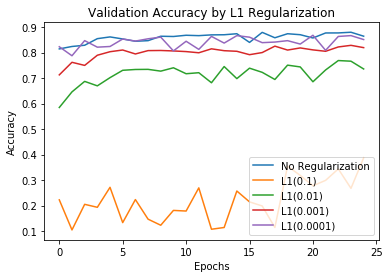

In [49]:
plt.plot(networkR20_history.history['val_accuracy'])
plt.plot(networkR21_history.history['val_accuracy'])
plt.plot(networkR22_history.history['val_accuracy'])
plt.plot(networkR23_history.history['val_accuracy'])
plt.plot(networkR24_history.history['val_accuracy'])
plt.title('Validation Accuracy by L1 Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['No Regularization', 'L1(0.1)', 'L1(0.01)', 'L1(0.001)', 'L1(0.0001)'], loc = 'lower right')
plt.show

We see that adding an L1 regularizer does nothing to help any overfitting problems, and only serves to make the model less accurate with no benefit. For this reason, we will exclude any L1 regularizer from this network.
## Learning Rate
We will keep the general optimizer, rmsprop, for this model. We will, however, adjust the learning rate hyper-parameter within this optimizer. To do this, we will create a number of new optimizers, copies of rmsprop, but with a learning rate other than the default of 0.001. We will use learning rates of 0.01, 0.0001, and 0.00001, along with the default. 

In [50]:
optimizer5 = tf.keras.optimizers.RMSprop(learning_rate = 0.00001)
optimizer4 = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate = 0.01)

In [51]:
networkL2 = tf.keras.models.Sequential()
networkL2.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkL2.add(tf.keras.layers.Dropout(0.3))
networkL2.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkL2.compile(optimizer = optimizer2, loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkL2_history = networkL2.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 39us/sample - loss: 1.5815 - accuracy: 0.6548 - val_loss: 1.2460 - val_accuracy: 0.6633
Epoch 2/25
54000/54000 [==============================] - 2s 28us/sample - loss: 1.1065 - accuracy: 0.7075 - val_loss: 0.7551 - val_accuracy: 0.7710
Epoch 3/25
54000/54000 [==============================] - 1s 26us/sample - loss: 1.0502 - accuracy: 0.7185 - val_loss: 1.4732 - val_accuracy: 0.6038
Epoch 4/25
54000/54000 [==============================] - 2s 42us/sample - loss: 1.0084 - accuracy: 0.7268 - val_loss: 3.0228 - val_accuracy: 0.6038
Epoch 5/25
54000/54000 [==============================] - 3s 55us/sample - loss: 1.0658 - accuracy: 0.7337 - val_loss: 0.7170 - val_accuracy: 0.7848
Epoch 6/25
54000/54000 [==============================] - 2s 46us/sample - loss: 0.9823 - accuracy: 0.7313 - val_loss: 0.6967 - val_accuracy: 0.8138
Epoch 7/25
54000/54000 [==============================] -

In [52]:
networkL3 = tf.keras.models.Sequential()
networkL3.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkL3.add(tf.keras.layers.Dropout(0.3))
networkL3.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkL3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkL3_history = networkL3.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 57us/sample - loss: 0.9348 - accuracy: 0.7615 - val_loss: 0.7033 - val_accuracy: 0.8182
Epoch 2/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.6583 - accuracy: 0.8246 - val_loss: 0.5779 - val_accuracy: 0.8442
Epoch 3/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.5772 - accuracy: 0.8406 - val_loss: 0.5139 - val_accuracy: 0.8552
Epoch 4/25
54000/54000 [==============================] - 2s 33us/sample - loss: 0.5344 - accuracy: 0.8454 - val_loss: 0.5260 - val_accuracy: 0.8527
Epoch 5/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.5091 - accuracy: 0.8510 - val_loss: 0.4783 - val_accuracy: 0.8593
Epoch 6/25
54000/54000 [==============================] - 2s 42us/sample - loss: 0.4900 - accuracy: 0.8535 - val_loss: 0.4840 - val_accuracy: 0.8542
Epoch 7/25
54000/54000 [==============================] -

In [53]:
networkL4 = tf.keras.models.Sequential()
networkL4.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkL4.add(tf.keras.layers.Dropout(0.3))
networkL4.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkL4.compile(optimizer = optimizer4, loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkL4_history = networkL4.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 44us/sample - loss: 1.4229 - accuracy: 0.6565 - val_loss: 1.0019 - val_accuracy: 0.7795
Epoch 2/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.9738 - accuracy: 0.7816 - val_loss: 0.8561 - val_accuracy: 0.8103
Epoch 3/25
54000/54000 [==============================] - 2s 30us/sample - loss: 0.8580 - accuracy: 0.8109 - val_loss: 0.7827 - val_accuracy: 0.8295
Epoch 4/25
54000/54000 [==============================] - 2s 28us/sample - loss: 0.7948 - accuracy: 0.8221 - val_loss: 0.7409 - val_accuracy: 0.8397
Epoch 5/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.7501 - accuracy: 0.8306 - val_loss: 0.7012 - val_accuracy: 0.8417
Epoch 6/25
54000/54000 [==============================] - 2s 32us/sample - loss: 0.7162 - accuracy: 0.8369 - val_loss: 0.6765 - val_accuracy: 0.8468
Epoch 7/25
54000/54000 [==============================] -

In [54]:
networkL5 = tf.keras.models.Sequential()
networkL5.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
networkL5.add(tf.keras.layers.Dropout(0.3))
networkL5.add(tf.keras.layers.Dense(10, activation = 'softmax'))
networkL5.compile(optimizer = optimizer5, loss = 'categorical_crossentropy', metrics = ['accuracy'])
networkL5_history = networkL5.fit(x_train, 
                      y_train,
                      epochs = 25,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 45us/sample - loss: 2.4267 - accuracy: 0.3076 - val_loss: 2.0507 - val_accuracy: 0.6330
Epoch 2/25
54000/54000 [==============================] - 3s 48us/sample - loss: 1.9094 - accuracy: 0.5678 - val_loss: 1.6547 - val_accuracy: 0.6860
Epoch 3/25
54000/54000 [==============================] - 2s 43us/sample - loss: 1.6049 - accuracy: 0.6437 - val_loss: 1.4198 - val_accuracy: 0.7152
Epoch 4/25
54000/54000 [==============================] - 3s 55us/sample - loss: 1.4260 - accuracy: 0.6775 - val_loss: 1.2806 - val_accuracy: 0.7330
Epoch 5/25
54000/54000 [==============================] - 2s 42us/sample - loss: 1.3163 - accuracy: 0.7003 - val_loss: 1.1926 - val_accuracy: 0.7522
Epoch 6/25
54000/54000 [==============================] - 3s 50us/sample - loss: 1.2391 - accuracy: 0.7196 - val_loss: 1.1319 - val_accuracy: 0.7590
Epoch 7/25
54000/54000 [==============================] -

<function matplotlib.pyplot.show(*args, **kw)>

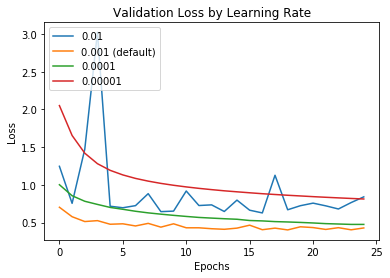

In [55]:
plt.plot(networkL2_history.history['val_loss'])
plt.plot(networkL3_history.history['val_loss'])
plt.plot(networkL4_history.history['val_loss'])
plt.plot(networkL5_history.history['val_loss'])
plt.title('Validation Loss by Learning Rate')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['0.01', '0.001 (default)', '0.0001', '0.00001'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

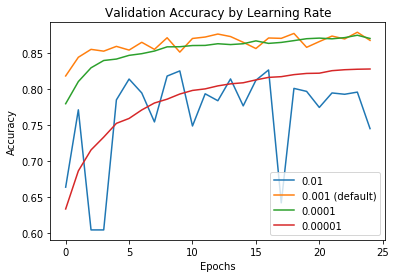

In [56]:
plt.plot(networkL2_history.history['val_accuracy'])
plt.plot(networkL3_history.history['val_accuracy'])
plt.plot(networkL4_history.history['val_accuracy'])
plt.plot(networkL5_history.history['val_accuracy'])
plt.title('Validation Accuracy by Learning Rate')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['0.01', '0.001 (default)', '0.0001', '0.00001'], loc = 'lower right')
plt.show

We see that a learning rate of 0.0001 significantly smooths out the loss and accuracy curves, without unduly affecting the time it takes to converge, as compared to the default. After about 40 epochs, it is objectively more accurate, but even before that time, it is very close and much more smooth. Therefore, we will use this learning rate in the final model. This will make the final model require many more epochs to train, but it will be significantly less prone to overfitting when complete compared to one that used the default learning rate.
# Evaluation
We've now completed our model. The network has been adjusted in every applicable hyper-parameter, and so we just need to put it all together and train until we've either begun overfitting or we're happy with the level of error. We'll train for 200 epochs, as this is a sweet spot for both time invested and incremental reward gained.

In [57]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
network.add(tf.keras.layers.Dropout(0.3))
network.add(tf.keras.layers.Dense(10, activation = 'softmax'))
network.compile(optimizer = optimizer4, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
network.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = network.fit(x_train, 
                      y_train,
                      epochs = 200,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 59us/sample - loss: 1.4331 - accuracy: 0.6564 - val_loss: 1.0106 - val_accuracy: 0.7798
Epoch 2/200
54000/54000 [==============================] - 2s 43us/sample - loss: 0.9824 - accuracy: 0.7796 - val_loss: 0.8598 - val_accuracy: 0.8163
Epoch 3/200
54000/54000 [==============================] - 2s 44us/sample - loss: 0.8673 - accuracy: 0.8070 - val_loss: 0.7895 - val_accuracy: 0.8265
Epoch 4/200
54000/54000 [==============================] - 3s 54us/sample - loss: 0.8011 - accuracy: 0.8204 - val_loss: 0.7416 - val_accuracy: 0.8322
Epoch 5/200
54000/54000 [==============================] - 3s 49us/sample - loss: 0.7540 - accuracy: 0.8294 - val_loss: 0.7062 - val_accuracy: 0.8405
Epoch 6/200
54000/54000 [==============================] - 2s 44us/sample - loss: 0.7174 - accuracy: 0.8366 - val_loss: 0.6819 - val_accuracy: 0.8382
Epoch 7/200
54000/54000 [==========================

Epoch 50/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3786 - accuracy: 0.8914 - val_loss: 0.4039 - val_accuracy: 0.8787
Epoch 51/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3751 - accuracy: 0.8929 - val_loss: 0.3967 - val_accuracy: 0.8828
Epoch 52/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3749 - accuracy: 0.8914 - val_loss: 0.3927 - val_accuracy: 0.8835
Epoch 53/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3728 - accuracy: 0.8924 - val_loss: 0.3940 - val_accuracy: 0.8828
Epoch 54/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3699 - accuracy: 0.8925 - val_loss: 0.3949 - val_accuracy: 0.8797
Epoch 55/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3677 - accuracy: 0.8930 - val_loss: 0.3883 - val_accuracy: 0.8815
Epoch 56/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3658 - ac

54000/54000 [==============================] - 1s 27us/sample - loss: 0.3064 - accuracy: 0.9099 - val_loss: 0.3583 - val_accuracy: 0.8848
Epoch 105/200
54000/54000 [==============================] - 1s 26us/sample - loss: 0.3072 - accuracy: 0.9094 - val_loss: 0.3558 - val_accuracy: 0.8862
Epoch 106/200
54000/54000 [==============================] - 1s 26us/sample - loss: 0.3045 - accuracy: 0.9100 - val_loss: 0.3509 - val_accuracy: 0.8885
Epoch 107/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3047 - accuracy: 0.9097 - val_loss: 0.3513 - val_accuracy: 0.8887
Epoch 108/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3046 - accuracy: 0.9104 - val_loss: 0.3636 - val_accuracy: 0.8883
Epoch 109/200
54000/54000 [==============================] - 3s 60us/sample - loss: 0.3030 - accuracy: 0.9100 - val_loss: 0.3507 - val_accuracy: 0.8863
Epoch 110/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3026 - accuracy:

Epoch 158/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2736 - accuracy: 0.9205 - val_loss: 0.3383 - val_accuracy: 0.8908
Epoch 159/200
54000/54000 [==============================] - 1s 26us/sample - loss: 0.2713 - accuracy: 0.9213 - val_loss: 0.3371 - val_accuracy: 0.8925
Epoch 160/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2723 - accuracy: 0.9211 - val_loss: 0.3398 - val_accuracy: 0.8893
Epoch 161/200
54000/54000 [==============================] - 3s 52us/sample - loss: 0.2715 - accuracy: 0.9204 - val_loss: 0.3399 - val_accuracy: 0.8917
Epoch 162/200
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2710 - accuracy: 0.9214 - val_loss: 0.3363 - val_accuracy: 0.8940
Epoch 163/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2697 - accuracy: 0.9222 - val_loss: 0.3376 - val_accuracy: 0.8903
Epoch 164/200
54000/54000 [==============================] - 2s 38us/sample - loss: 0.26

<function matplotlib.pyplot.show(*args, **kw)>

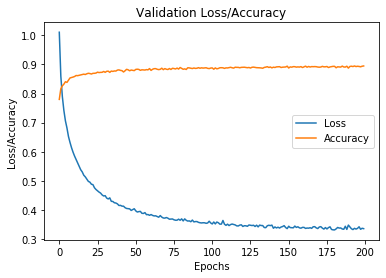

In [60]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Validation Loss/Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'], loc = 'center right')
plt.show

As we can see, the model reaches a minimum loss at 200 epochs, so we're finished. We'll now finally test it against the test set.

In [61]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.8917


As we can see, the model has an ~89.1% accuracy on the test set. This is only 0.1% less than the validation accuracy at this point, suggesting only very slight overfitting. Without using techniques like convolutional layers, this is likely the best our model can do.  

## MNIST
Interestingly, since Fashion_MNIST is designed to be a drag-and-drop replacement for MNIST, we can easily test our network on MNIST. This will give us a chance to see if the model is specifically good for this dataset, or if it's generally good for any similar datasets.

In [62]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = tf.keras.datasets.mnist.load_data()
mnist_x_train = mnist_x_train.reshape((60000, 28 * 28))
mnist_x_train = mnist_x_train.astype('float32') / 255
mnist_x_test = mnist_x_test.reshape((10000, 28 * 28))
mnist_x_test = mnist_x_test.astype('float32') / 255
mnist_y_train = to_categorical(mnist_y_train)
mnist_y_test = to_categorical(mnist_y_test)

In [65]:
mnist_network = tf.keras.models.Sequential()
mnist_network.add(tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (28 * 28,)))
mnist_network.add(tf.keras.layers.Dropout(0.3))
mnist_network.add(tf.keras.layers.Dense(10, activation = 'softmax'))
mnist_network.compile(optimizer = optimizer4, loss = 'categorical_crossentropy', metrics = ['accuracy'])
mnist_history = mnist_network.fit(mnist_x_train, 
                      mnist_y_train,
                      epochs = 20,
                      batch_size = 256,
                      validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 59us/sample - loss: 1.4921 - accuracy: 0.6976 - val_loss: 0.7975 - val_accuracy: 0.8952
Epoch 2/20
54000/54000 [==============================] - 2s 44us/sample - loss: 0.7711 - accuracy: 0.8624 - val_loss: 0.5549 - val_accuracy: 0.9222
Epoch 3/20
54000/54000 [==============================] - 2s 41us/sample - loss: 0.6150 - accuracy: 0.8892 - val_loss: 0.4703 - val_accuracy: 0.9310
Epoch 4/20
54000/54000 [==============================] - 2s 39us/sample - loss: 0.5408 - accuracy: 0.9037 - val_loss: 0.4242 - val_accuracy: 0.9377
Epoch 5/20
54000/54000 [==============================] - 2s 41us/sample - loss: 0.4929 - accuracy: 0.9111 - val_loss: 0.3915 - val_accuracy: 0.9420
Epoch 6/20
54000/54000 [==============================] - 2s 40us/sample - loss: 0.4573 - accuracy: 0.9183 - val_loss: 0.3662 - val_accuracy: 0.9465
Epoch 7/20
54000/54000 [==============================] -

In [66]:
mnist_test_loss, mnist_test_acc = mnist_network.evaluate(mnist_x_test, mnist_y_test)
print('MNIST Test Accuracy:', mnist_test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

MNIST Test Accuracy: 0.9593


We can see that the model performs very well on the MNIST dataset, achieving accuracies of ~96%, despite being designed for the Fashion_MNIST dataset. This suggests that our model is generalizable to any dataset that fits the parameters of those datasets: 28 * 28 inputs representing grayscale pixel values of some image, with the desired output being 1 of 10 mutually exclusive classes. It might also be possible to generalize further, with a grid larger than 28 * 28, more classes, or more channels of color, with the same skeleton of the model developed here.